In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [66]:
df = pd.read_csv('indian_liver_patient.csv') 

In [67]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [68]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [69]:
print("Shape of dataset:", df.shape)


Shape of dataset: (583, 11)


In [70]:
df['Dataset'].value_counts()

Dataset
1    416
2    167
Name: count, dtype: int64

In [71]:
df['Dataset'] = df['Dataset'].apply(lambda x: 1 if x==1 else 0)
print("\n✅ Converted target: now 1 = liver disease, 0 = healthy")


✅ Converted target: now 1 = liver disease, 0 = healthy


In [72]:
df['Dataset'].value_counts()


Dataset
1    416
0    167
Name: count, dtype: int64

In [73]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  

In [74]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [75]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [76]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [77]:
print(df['Dataset'].value_counts())

Dataset
1    416
0    167
Name: count, dtype: int64


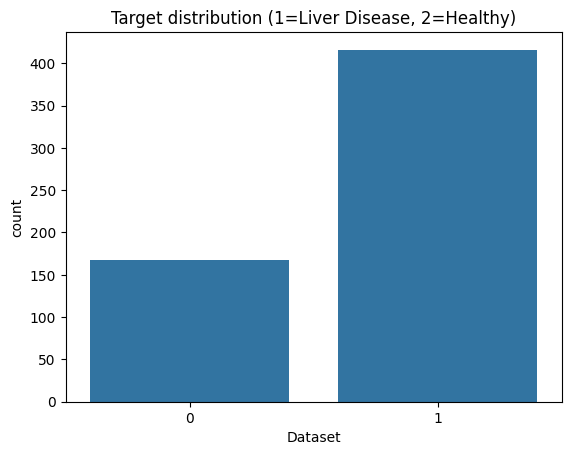

In [78]:
sns.countplot(x='Dataset', data=df)
plt.title('Target distribution (1=Liver Disease, 2=Healthy)')
plt.show()

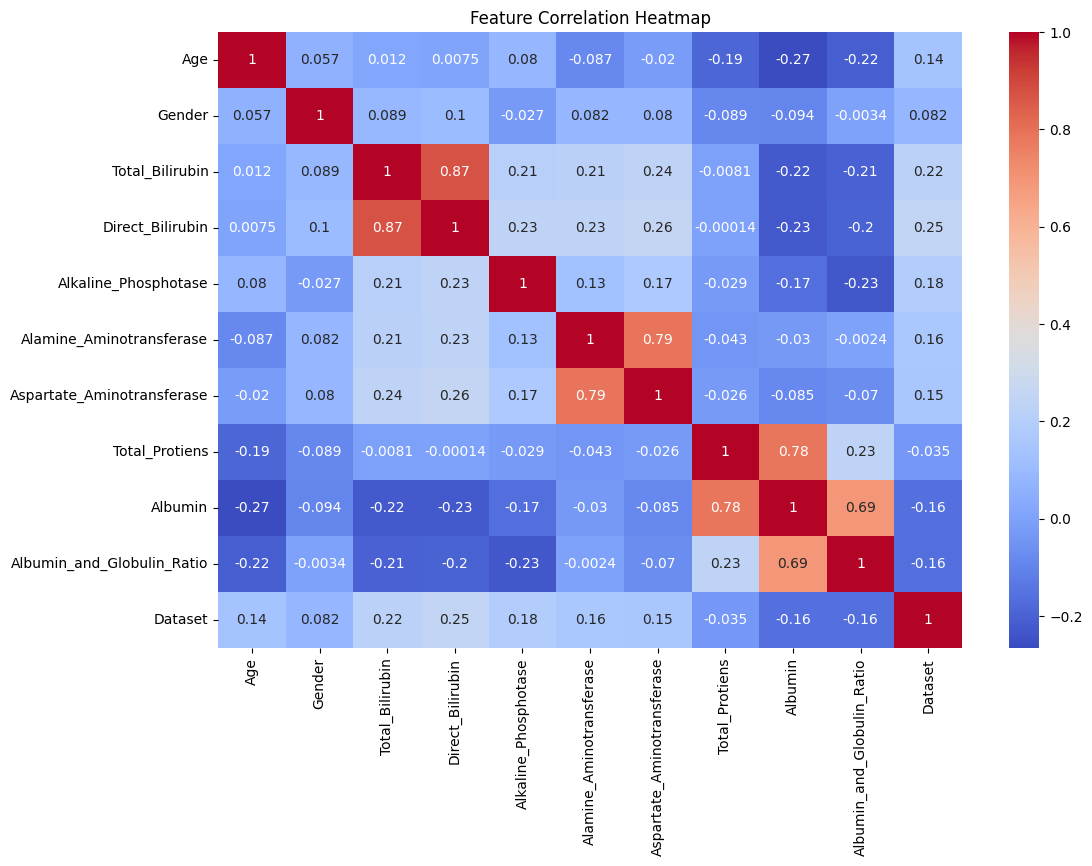

In [79]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [80]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)
print("\nFilled missing Albumin_and_Globulin_Ratio with median.")


Filled missing Albumin_and_Globulin_Ratio with median.


C:\Users\Rapid IT World\AppData\Local\Temp\ipykernel_8468\1682785610.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)


In [81]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

#### Target column is 'Dataset' (1=liver disease, 0=healthy)

In [82]:
X = df.drop("Dataset", axis=1)
Y = df["Dataset"]

In [83]:
print(X.shape, Y.shape)

(583, 10) (583,)


In [84]:
print("\nUpdated target distribution:\n", df['Dataset'].value_counts())


Updated target distribution:
 Dataset
1    416
0    167
Name: count, dtype: int64


In [85]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [86]:
rf.fit(X,Y)

RandomForestClassifier(random_state=42)

In [87]:
impotant_feature = pd.Series(rf.feature_importances_, index=X.columns)
top_feature = impotant_feature.sort_values(ascending = False).head(7).index.to_list()

In [88]:
top_feature

['Alkaline_Phosphotase',
 'Aspartate_Aminotransferase',
 'Age',
 'Alamine_Aminotransferase',
 'Total_Bilirubin',
 'Albumin',
 'Total_Protiens']

In [89]:
new_X = X[top_feature]

In [90]:
new_X.isnull().sum()

Alkaline_Phosphotase          0
Aspartate_Aminotransferase    0
Age                           0
Alamine_Aminotransferase      0
Total_Bilirubin               0
Albumin                       0
Total_Protiens                0
dtype: int64

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(new_X, Y, test_size=0.2, random_state=42, stratify=Y)

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
# Apply SMOTE only to training set
sm = SMOTE(random_state=42)
x_train_sm , y_train_sm = sm.fit_resample(X_train, Y_train)

In [94]:
liver_model = LogisticRegression(max_iter=1000, random_state=42)
liver_model.fit(x_train_sm, y_train_sm)

LogisticRegression(max_iter=1000, random_state=42)

 ###  Models Performance

In [95]:

train_pred = liver_model.predict(x_train_sm)

In [96]:
accuracy_score(y_train_sm, train_pred)

0.6996996996996997

In [97]:
## Random Forest
rf = RandomForestClassifier(
     class_weight='balanced',
    random_state=42,
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=5, 
    min_samples_leaf=3, 
)
rf.fit(x_train_sm, y_train_sm)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=3, min_samples_split=5,
                       random_state=42)

In [98]:
train_pred1 = rf.predict(x_train_sm)

In [99]:
accuracy_score(y_train_sm, train_pred1)

0.9624624624624625

In [100]:
y_pred1 = rf.predict(X_test)

In [101]:
accuracy_score(Y_test, y_pred1)

0.7521367521367521

In [102]:
print(confusion_matrix(Y_test, y_pred1))

[[19 15]
 [14 69]]


In [103]:
print(classification_report(Y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57        34
           1       0.82      0.83      0.83        83

    accuracy                           0.75       117
   macro avg       0.70      0.70      0.70       117
weighted avg       0.75      0.75      0.75       117



In [105]:
from joblib import dump


# Save the model to a file
dump(liver_model, "models/liver_model.joblib")


['models/liver_model.joblib']